# Convolutional Neural Network for ِArabic Handwritten Characters dataset classification

Arabic Handwritten Characters dataset
    
Arabic Handwritten Characters Recognition Using Convolutional Neural Network
Ahmed El-Sawy, Mohamed Loey, Hazem EL-Bakry
WSEAS Transactions on Computer Research, ISSN / E-ISSN: 1991-8755 / 2415-1521, Volume 5, 2017, Art. 2, pp. 11-19



In [1]:
from __future__ import division, print_function, absolute_import

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tflearn
from tflearn.data_utils import to_categorical
import tflearn.data_utils as du
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# read training & testing data

trainx = pd.read_csv("../input/csvTrainImages 13440x1024.csv",header=None)
trainy = pd.read_csv("../input/csvTrainLabel 13440x1.csv",header=None)

testx = pd.read_csv("../input/csvTestImages 3360x1024.csv",header=None)
testy = pd.read_csv("../input/csvTestLabel 3360x1.csv",header=None)

In [3]:
trainx.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Split data into training set and validation set
#training images
trainx = trainx.values.astype('float32')
#training labels
trainy = trainy.values.astype('int32')-1

#testing images
testx = testx.values.astype('float32')
#testing labels
testy = testy.values.astype('int32')-1

In [5]:
trainx[0]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [6]:
original_trainy = trainy
#One Hot encoding of train labels.
trainy = to_categorical(trainy,28)

original_testy = testy
#One Hot encoding of test labels.
testy = to_categorical(testy,28)

In [7]:
trainy[27]

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]], dtype=float32)

In [8]:
print(trainx.shape, trainy.shape, testx.shape, testy.shape)

(13440, 1024) (13440, 1, 28) (3360, 1024) (3360, 1, 28)


In [9]:
# reshape input images to 28x28x1
trainx = trainx.reshape([-1, 32, 32, 1])
testx = testx.reshape([-1, 32, 32, 1])

In [10]:
print(trainx.shape, trainy.shape, testx.shape, testy.shape)

(13440, 32, 32, 1) (13440, 1, 28) (3360, 32, 32, 1) (3360, 1, 28)


## Visualiza Data

In [11]:
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

arabic_labels = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain', 
                'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']

Text(0.5,1,'sheen')

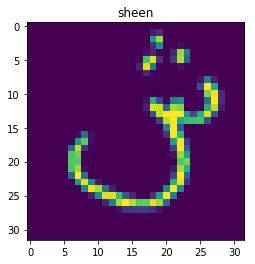

In [12]:
import random
x = random.randint(0, 13440)
plt.imshow(trainx[x].squeeze().T)
plt.title(arabic_labels[original_trainy[x][0]])

In [13]:
#Zero center every sample with specified mean. If not specified, the mean is evaluated over all samples.
trainx, mean1 = du.featurewise_zero_center(trainx)
testx, mean2 = du.featurewise_zero_center(testx)

In [14]:
print(trainx.shape, trainy.shape, testx.shape, testy.shape)

(13440, 32, 32, 1) (13440, 1, 28) (3360, 32, 32, 1) (3360, 1, 28)


In [15]:
trainx[0]

array([[[-0.12157738],
        [-0.02135417],
        [-0.00974702],
        ..., 
        [-0.0546875 ],
        [-0.06145833],
        [-0.22909226]],

       [[-0.04188988],
        [-0.01220238],
        [-0.00744048],
        ..., 
        [-0.0515625 ],
        [-0.03988095],
        [-0.07589286]],

       [[-0.03251488],
        [-0.00133929],
        [-0.02619048],
        ..., 
        [-0.08779762],
        [-0.02872024],
        [-0.04799107]],

       ..., 
       [[-0.02180059],
        [-0.00252976],
        [-0.01979167],
        ..., 
        [-0.14352679],
        [-0.10409226],
        [-0.16220239]],

       [[-0.04441964],
        [-0.01517857],
        [-0.01808036],
        ..., 
        [-0.11063988],
        [-0.10357143],
        [-0.26212797]],

       [[-0.48229167],
        [-0.21770833],
        [-0.14575893],
        ..., 
        [-0.2421131 ],
        [-0.30617559],
        [-0.93102676]]], dtype=float32)

In [16]:
# Building convolutional network
network = input_data(shape=[None, 32, 32, 1], name='input')
network = conv_2d(network, 80, 3, activation='relu', regularizer="L2")
network = max_pool_2d(network, 2)
network = local_response_normalization(network)
network = conv_2d(network, 64, 3, activation='relu', regularizer="L2")
network = max_pool_2d(network, 2)
network = local_response_normalization(network)
network = fully_connected(network, 1024, activation='relu')
network = dropout(network, 0.8)
network = fully_connected(network, 512, activation='relu')
network = dropout(network, 0.8)
network = fully_connected(network, 28, activation='softmax')
network = regression(network, optimizer='sgd', learning_rate=0.01,
                     loss='categorical_crossentropy', name='target')

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


In [17]:
#model complile
model = tflearn.DNN(network, tensorboard_verbose=0)

In [18]:
#model fitting
model.fit({'input': trainx}, {'target': trainy}, n_epoch=30,
           validation_set=({'input': testx}, {'target': testy}),
           snapshot_step=100, show_metric=True, run_id='convnet_arabic_digits')

---------------------------------
Run id: convnet_arabic_digits
Log directory: /tmp/tflearn_logs/
INFO:tensorflow:Summary name Accuracy/ (raw) is illegal; using Accuracy/__raw_ instead.
---------------------------------
Training samples: 13440
Validation samples: 3360
--


ValueError: Cannot feed value of shape (64, 1, 28) for Tensor 'target/Y:0', which has shape '(?, 28)'

In [19]:
# Evaluate model
score = model.evaluate(testx, testy)
print('Test accuarcy: %0.2f%%' % (score[0] * 100))

ValueError: Cannot feed value of shape (128, 1, 28) for Tensor 'target/Y:0', which has shape '(?, 28)'